In [66]:
from keras.applications import VGG16
from keras.applications import imagenet_utils
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import load_img
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
import os
import cv2
import pickle
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [49]:
model = VGG16(include_top=False,input_shape=(48,144,3),pooling=None)

In [50]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 144, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 144, 64)    │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 144, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 36, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 36, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 18, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 18, 512)     │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 18, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 18, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
for l in model.layers:
    l.trainable=False

In [70]:
a = Flatten()(model.output)
a = Dense(128,activation='relu')(a)
a = Dense(64,activation='relu')(a)
a = Flatten()(a)

out1 = Dense(32, activation="softmax", name="char1")(a)
out2 = Dense(32, activation="softmax", name="char2")(a)
out3 = Dense(32, activation="softmax", name="char3")(a)
out4 = Dense(32, activation="softmax", name="char4")(a)


model2 = Model(model.input,outputs=[out1, out2, out3, out4])
model2.compile('adam','categorical_crossentropy',metrics=['accuracy', 'accuracy', 'accuracy', 'accuracy'])


In [53]:
model2.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 144,   │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 48, 144,   │      1,792 │ input_layer_3[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 48, 144,   │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 24, 72,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 24, 72,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 24, 72,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 12, 36,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 12, 36,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 12, 36,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 12, 36,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 6, 18,     │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 6, 18,     │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 6, 18,     │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 6, 18,     │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 3, 9, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 3, 9, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 3, 9, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 14,993,536 (57.20 MB)

 Trainable params: 278,848 (1.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [54]:
with open('encoder.bin','rb')as f:
    encoder = pickle.load(f)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [55]:
encoder.classes_

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [100]:
def datagenerator(path, batch_size=100):
    pattern= os.path.join(path,'*.png')
    fills= glob(pattern)
    while True:
        offset=0
        while offset<len(fills):
            items = fills[offset:offset+batch_size]
            offset+=batch_size
            x = []
            y1 = []
            y2 = []
            y3 = []
            y4 = []
            for f in items:
                char = list(os.path.splitext(os.path.basename(f))[0])
                if len(char)!=4:
                    continue
                im = cv2.imread(f)
                im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
                im = cv2.resize(im,(144,48)).astype(np.float32)
                im = imagenet_utils.preprocess_input(im)
                x.append(im)
                char = [to_categorical(encoder.transform([i]),num_classes=len(encoder.classes_)).reshape(-1) for i in char]
                y1.append(char[0])
                y2.append(char[1])
                y3.append(char[2])
                y4.append(char[3])
            X = np.array(x,ndmin=4)
            Y1 = np.array(y1)
            Y2 = np.array(y2)
            Y3 = np.array(y3)
            Y4 = np.array(y4)
            yield X,(Y1,Y2,Y3,Y4)

In [60]:
# data = datagenerator('train')
# for x,y in data:
#     print(len(x),len(y))
#     # print(x.shape,y.shape)

In [74]:
# تعریف output_signature برای ۴ خروجی
num_classes = len(encoder.classes_)
output_signature = (
    tf.TensorSpec(shape=(None, 48, 144, 3), dtype=tf.float32),  # ورودی تصویر
    (
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),  # Y1
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),  # Y2
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),  # Y3
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)   # Y4
    )
)


def create_dataset(path, batch_size=100):
    def gen():
        return datagenerator(path, batch_size)

    dataset = tf.data.Dataset.from_generator(
        gen,
        output_signature=output_signature
    )
    return dataset



In [80]:
train_dir = 'train'
val_dir   = 'test'

batch_size = 100
steps_per_epoch  = max(1, len(glob(train_dir+'/*.png')) // batch_size)
val_steps        = max(1, len(glob(val_dir  +'/*.png')) // batch_size)

# h = model2.fit(
#     datagenerator(train_dir, batch_size=batch_size),
#     steps_per_epoch=steps_per_epoch,
#     epochs=40
# )



train_dataset = create_dataset(train_dir, batch_size)
val_dataset = create_dataset(val_dir, batch_size)

h = model2.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=val_dataset,
    validation_steps=val_steps
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - char1_accuracy: 0.9568 - char1_loss: 0.1250 - char2_accuracy: 0.7304 - char2_loss: 0.8325 - char3_accuracy: 0.7120 - char3_loss: 0.8676 - char4_accuracy: 0.8764 - char4_loss: 0.3656 - loss: 2.1906 - val_char1_accuracy: 0.8700 - val_char1_loss: 0.5819 - val_char2_accuracy: 0.4600 - val_char2_loss: 2.2623 - val_char3_accuracy: 0.4500 - val_char3_loss: 2.1299 - val_char4_accuracy: 0.7300 - val_char4_loss: 1.2278 - val_loss: 6.2019
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - char1_accuracy: 0.9731 - char1_loss: 0.0914 - char2_accuracy: 0.7591 - char2_loss: 0.7565 - char3_accuracy: 0.7455 - char3_loss: 0.7947 - char4_accuracy: 0.8981 - char4_loss: 0.3179 - loss: 1.9709 - val_char1_accuracy: 0.8900 - val_char1_loss: 0.5124 - val_char2_accuracy: 0.4100 - val_char2_loss: 2.3254 - val_char3_accuracy: 0.4600 - val_char3_loss: 2.1990 - val_char4_accuracy: 0.7200 - val_char4_loss: 1.2906 - val_loss: 6.3274
Epoch 3/10
98/98 ━━━━━━━━━

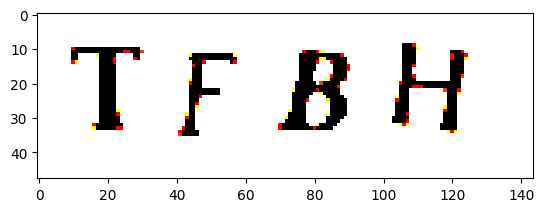

In [97]:
f = ('test/TFBH.png')
im = cv2.imread(f)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im,(144,48))
im = np.array(im)
f = imagenet_utils.preprocess_input(im)
# f = cv2.resize(f,(144,48))
# f.shape
plt.imshow(f)


In [98]:
p = model2.predict(f.reshape(1,48,144,3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


In [99]:
for i in p:
    # print(np.argmax(i))
    print(encoder.inverse_transform([np.argmax(i)]))

['T']
['F']
['R']
['H']


In [101]:
model2.save('model2.keras')